<a href="https://colab.research.google.com/github/yukiharada1228/MPRGDeepLearningLectureNotebook/blob/master/Optuna%E5%85%A5%E9%96%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Optuna入門
- ハイパーパラメータ自動最適化フレームワークOptuna
    - 株式会社Preferred Networksがオープンソースで提供するハイパーパラメータ自動最適化フレームワークです．
    - 深層学習フレームワークChainer，Pytorchをはじめ、様々な機械学習ソフトウェアと一緒に使用することが可能です．

## インストール
- pipコマンドでOptunaをGoogle Colaboratoryに導入します．

In [1]:
!pip -q install optuna==3.1.1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 365.7/365.7 KB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.3/212.3 KB 11.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 KB 5.3 MB/s eta 0:00:00


## 2次関数の最小値探索
 - yを最小化させるxをハイパーパラメータとしてOptunaで探索します．
### 例）
$$ y = (x - 5)^2 + 25 $$

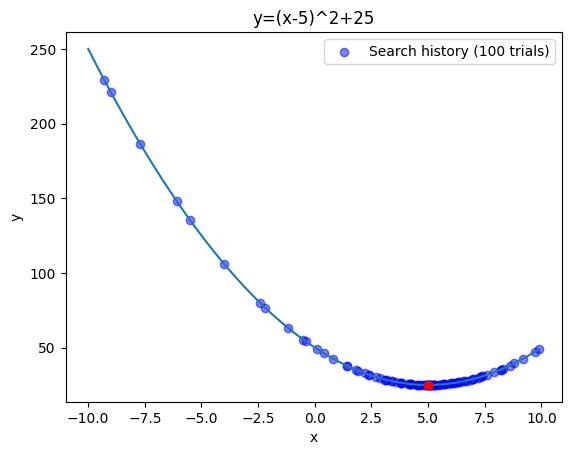

最適なパラメータ: x=5.0
最小値: y=25.0


In [42]:
import numpy as np
import matplotlib.pyplot as plt
import optuna

# Optunaのログを非表示にする
optuna.logging.disable_default_handler()

# 最適化する関数を定義
def y(x):
    return (x - 5)**2 + 25

# xの値域を定義
x_range = np.arange(-10, 10, 0.1)

# yの値域を計算
y_range = [y(x) for x in x_range]

# Optunaによる最小化問題を定義
def objective(trial):
    x = trial.suggest_float('x', -10, 10, step=0.1)  # xを連続値で指定し、stepを指定して0.1刻みにする
    return y(x)

# Optunaで探索
study = optuna.create_study()
study.optimize(objective, n_trials=100)  # 探索回数を指定

# 最適なxを取得し、最小値を計算
x_opt = study.best_params['x']  # 最適なxを取得
y_opt = y(x_opt)  # 最適なxでのyを計算

# Optunaによる探索履歴を取得
opt_x = [t.params['x'] for t in study.trials]  # 各試行のxの値をリストにまとめる
opt_y = [t.value for t in study.trials]  # 各試行の目的関数の値をリストにまとめる

# グラフを描画
plt.plot(x_range, y_range)
plt.xlabel('x')
plt.ylabel('y')
plt.title('y=(x-5)^2+25')

# 探索履歴をプロット
plt.scatter(opt_x, opt_y, c='b', alpha=0.5, label=f'Search history ({len(opt_x)} trials)')  # 探索履歴をプロット

# 最適なxの場所に点を打つ
plt.plot(x_opt, y_opt, 'ro')

plt.legend()
plt.show()

print(f"最適なパラメータ: x={x_opt}")  # 最適なパラメータを表示
print(f"最小値: y={y_opt}")  # 最小値を表示